In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/home/zero/Downloads/Theft_Data.csv')

In [3]:
X = data.iloc[ : , :-1]
Y = data.iloc[ : , 365]

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 8959 samples in the training set and 996 samples in the test set



/home/zero/documents/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
# Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1]
param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},{'svc__C': param_range,'svc__gamma': param_range,'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8839156155820962
{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [7]:
#Fitting SVM to the Training set
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', gamma = 0.01, C = 0.1,random_state = 0)
svm.fit(X_train, Y_train)
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, Y_test)))

The accuracy of the svm classifier on test data is 0.89 out of 1


In [8]:
Y_pred = svm.predict(X_test)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pipe_svc.fit(X_train, Y_train)
Y_pred = pipe_svc.predict(X_test)
Y_true= Y_test
cm=confusion_matrix(Y_true,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[850  12]
 [ 90  44]]
             precision    recall  f1-score   support

          0       0.90      0.99      0.94       862
          1       0.79      0.33      0.46       134

avg / total       0.89      0.90      0.88       996

0.8975903614457831


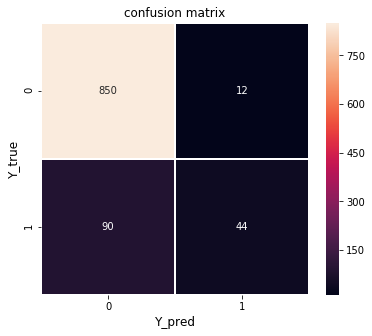

In [10]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(6,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel('Y_pred', size = 12)
plt.ylabel('Y_true', size =12)
plt.title('confusion matrix', size =12)
plt.savefig('confusion.jpg')
plt.show()

In [11]:
a = []
for i in range(50):
    a.append(i)
print (len(a))
b = Y_test[:50]
c = Y_pred[:50]

50


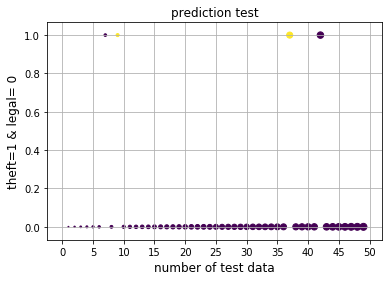

In [12]:
import matplotlib.pyplot as plt
import numpy

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 51, 5))
plt.xlabel('number of test data', size = 12)
plt.ylabel('theft=1 & legal= 0', size =12)
plt.title('prediction test', size =12)
plt.scatter(a,b,a,c)
plt.grid()
plt.savefig('prediction1.jpg')